# Finch Carr - Homework 05
- I want to work carefully through a numeric/simulated solution to Bayes' Theorem
- Bayes' Theorem can be defined as $P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$
## Problem 1A)
- I need to create a normal distribution background with a million background events.

In [1]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

(array([-6.74626866, -6.23880597, -5.73134328, -5.2238806 , -4.71641791,
        -4.20895522, -3.70149254, -3.19402985, -2.68656716, -2.17910448,
        -1.67164179, -1.1641791 , -0.65671642, -0.14925373,  0.35820896,
         0.86567164,  1.37313433,  1.88059701,  2.3880597 ,  2.89552239,
         3.40298507,  3.91044776,  4.41791045,  4.92537313,  5.43283582,
         5.94029851,  6.44776119,  6.95522388,  7.46268657,  7.97014925,
         8.47761194,  8.98507463,  9.49253731, 10.        , 10.50746269,
        11.01492537, 11.52238806, 12.02985075, 12.53731343, 13.04477612,
        13.55223881, 14.05970149, 14.56716418, 15.07462687, 15.58208955,
        16.08955224, 16.59701493, 17.10447761, 17.6119403 , 18.11940299,
        18.62686567, 19.13432836, 19.64179104, 20.14925373, 20.65671642,
        21.1641791 , 21.67164179, 22.17910448, 22.68656716, 23.19402985,
        23.70149254, 24.20895522, 24.71641791, 25.2238806 , 25.73134328,
        26.23880597, 26.74626866]),
 array([ 0.2564

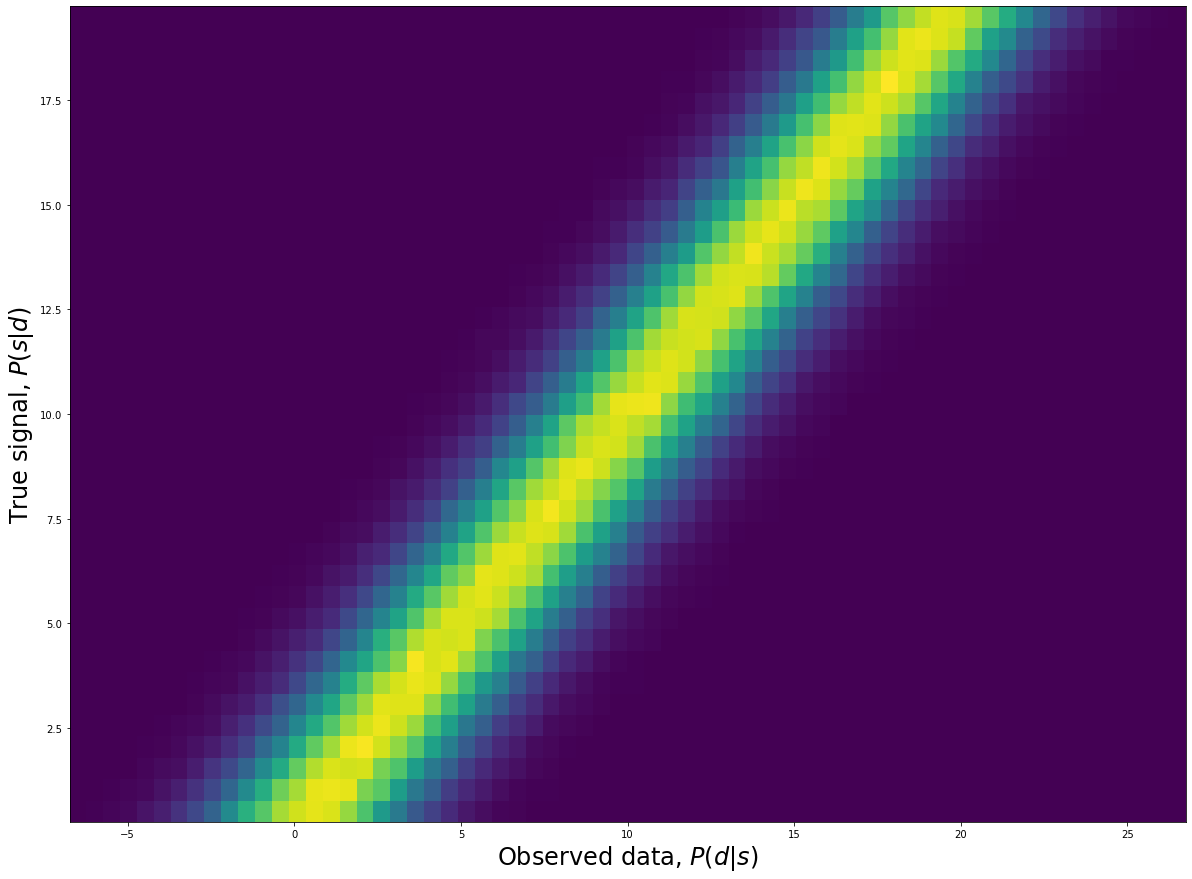

In [173]:
bkgd = stats.norm.rvs(loc=0, scale=2, size=1000000, random_state=1)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000, random_state=2)

data = bkgd + signal
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
datacenters, signalcenters

### Problem 1B)
- I want to select a true injected signal and plot the probability of the data giving me that signal with a stair plot
  - Graphically, I am setting a specific y-value, and plotting the probabilities of what I may observe given said y-value of true signal

[8.98947218 8.98960755 8.98975984 ... 9.99904065 9.9992138  9.99944027]
9.494630600738551
0.2924761430027002


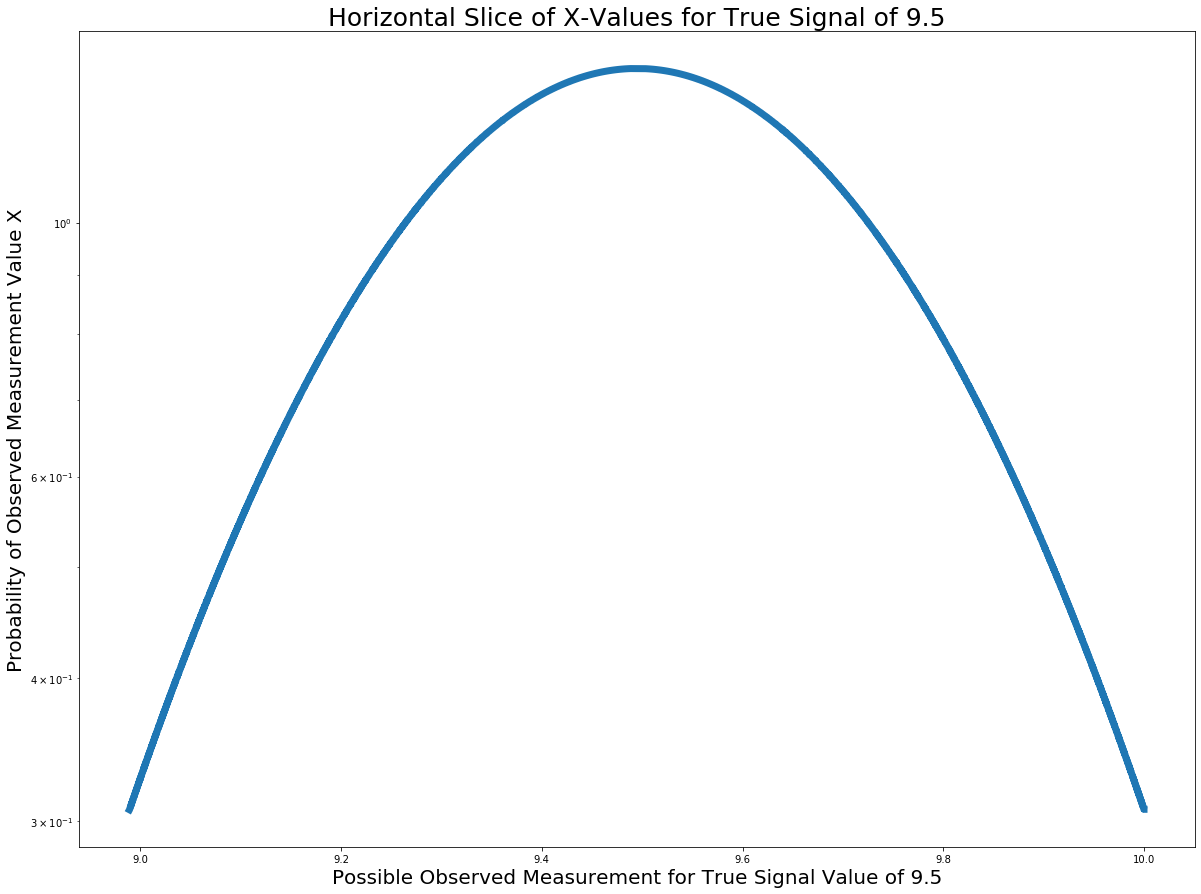

In [210]:
signalS = np.sort(signal)
dataS = np.sort(data)
ysliceA = []
for i in range(len(data)):
    if signalS[i] >= 8.98 and signalS[i] <= 10:
        ysliceA.append(dataS[i])

# The loop creates an array that graphically is a horizontal slice at a 
# y-value of 9.5 and finds every value in the observed data that could be 
# observed if the true signal is 9.5.

print(np.sort(ysliceA[0::10])) # Sampled (every tenth) values of data distribution
print(np.mean(ysliceA)) # Mean of the true signal range for plotting purposes
print(np.std(ysliceA)) # Std Deviation for plotting purposes of the pdf

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible Observed Measurement for True Signal Value of 9.5', size=20)
plt.ylabel('Probability of Observed Measurement Value X', size=20)
plt.title('Horizontal Slice of X-Values for True Signal of 9.5', size=25)
ax.step(np.sort(ysliceA), stats.norm.pdf(ysliceA, loc=np.mean(ysliceA), scale=np.std(ysliceA)), where='mid', linewidth=7)
plt.show()

- The graph above shows every value on a y-axis slice of $y=9.50$ and the probability distribution of that array of values
- Another way to explain the plot is the x-axis is the value observed when the true signal is 9.5, and the y-axis is the probability of observing any given data when the true signal measurement is 9.5
  - For example, when the true signal is 9.5, it is much more likely that you will observe  a measurement of 9.5 than you would a measurement of 11.5 or 7.5
### Problem 1C)
- Now what if I take any given observation, what is the probability distribution of true signals that could give that specific observation measurement?

15.113326576238977 is the mean of the signal values
0.003032152358840696 is the std deviation


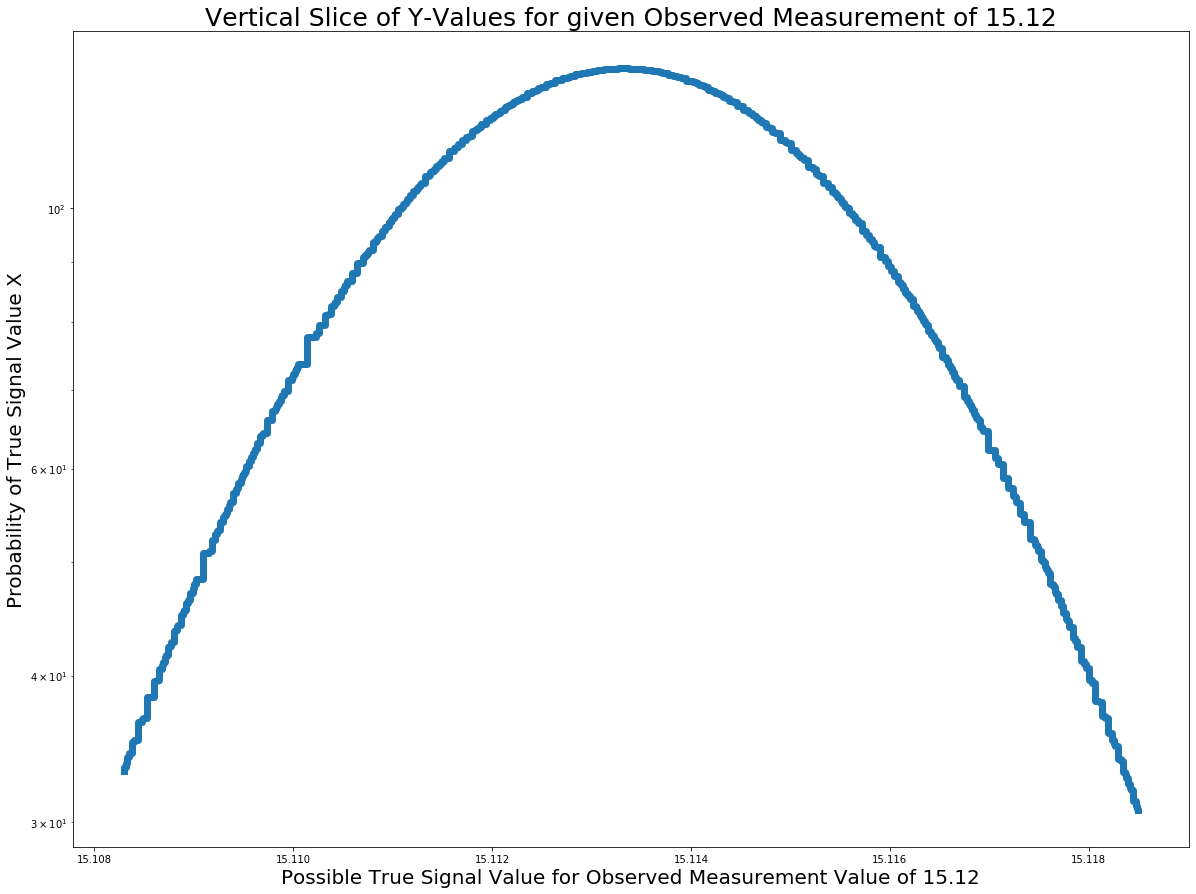

In [209]:
signalS = np.sort(signal)
dataS = np.sort(data)
xslice = []
for i in range(len(data)):
    if dataS[i] >= 15.12 and dataS[i] <= 15.13:
        xslice.append(signalS[i])

# The loop creates an array that graphically is a horizontal slice at a 
# y-value of 12, and finds every value in the observed data that could be 
# observed if the true signal is 12.

#print(np.sort(xslice[0::10])) # Sampled (every tenth) values of signal distribution
print(f'{np.mean(xslice)} is the mean of the signal values') # Mean signal value for this observed data slice
print(f'{np.std(xslice)} is the std deviation') # Std Deviation for plotting purposes of the pdf

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible True Signal Value for Observed Measurement Value of 15.12', size=20)
plt.ylabel('Probability of True Signal Value X', size=20)
plt.title('Vertical Slice of Y-Values for given Observed Measurement of 15.12', size=25)
ax.step(np.sort(xslice), stats.norm.pdf(xslice, loc=np.mean(xslice), scale=np.std(xslice)), where='mid', linewidth=7)
plt.show()

- This plot shows that for any observed signal of $x=15.128$, the true signal is much more likely to have a true signal value of 15 than it is to have a true signal value of 20 or 10
## Problem 2) 
- I want to repeat this process and make the plots shown above with a background distribution with a non-zero mean

Text(0.5, 0, 'Observed data, $P(d|s)$')

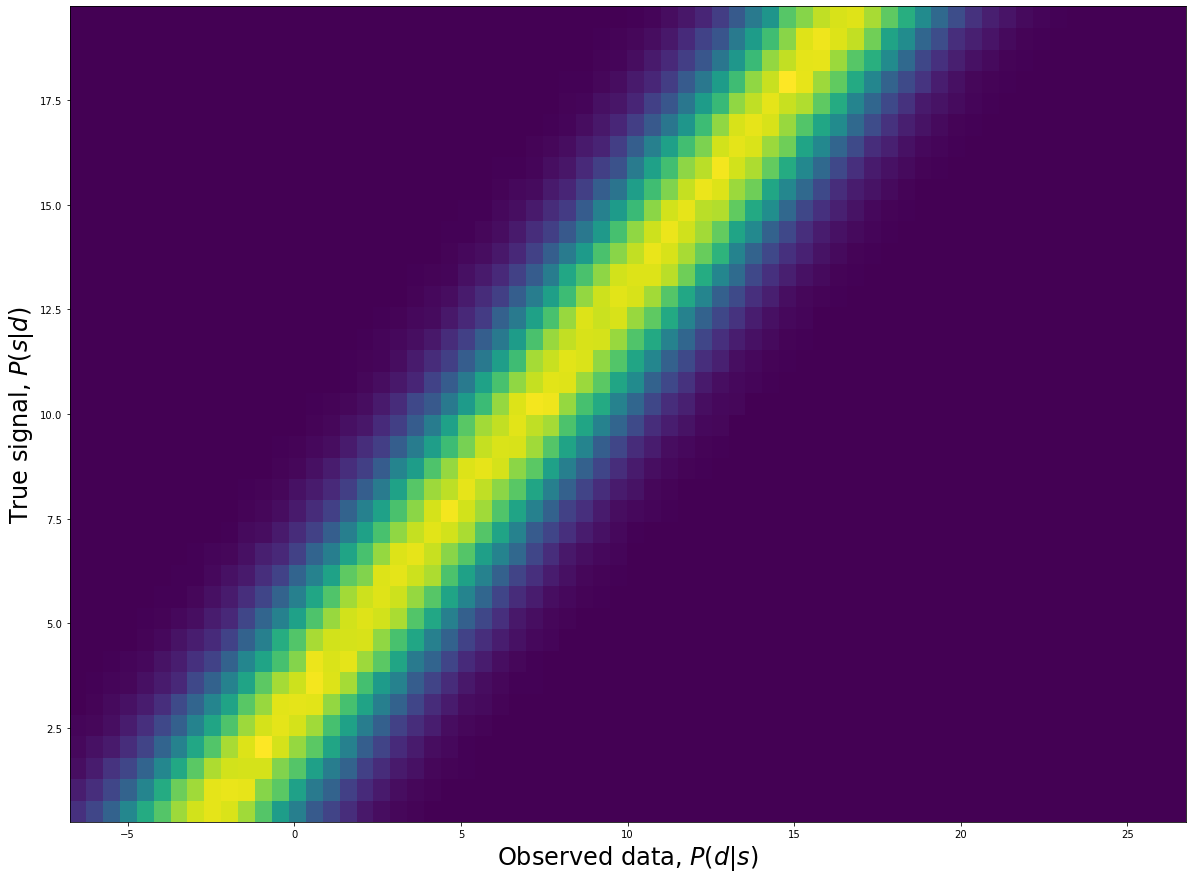

In [216]:
bkgd2 = stats.norm.rvs(loc=-3, scale=2, size=1000000, random_state=1)
signal2 = stats.uniform.rvs(loc=0, scale=20, size=1000000, random_state=2)

data2 = bkgd2 + signal2
signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp2, temp22= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd2.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

[5.98947218 5.98960755 5.98975984 ... 6.99904065 6.9992138  6.99944027]
6.4946306007385495
0.2924761430027002


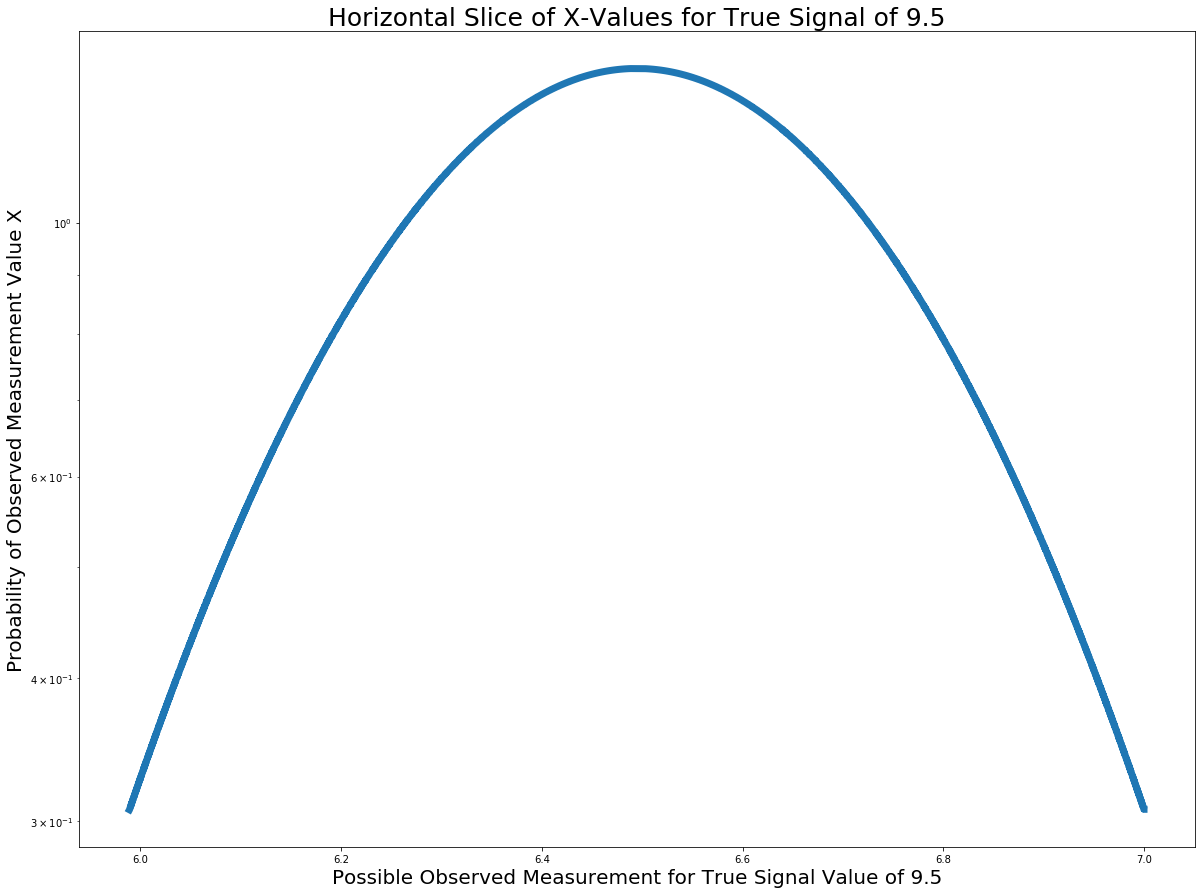

In [217]:
signal2S = np.sort(signal2)
data2S = np.sort(data2)
ysliceB = []
for i in range(len(data2)):
    if signal2S[i] >= 8.98 and signal2S[i] <= 10:
        ysliceB.append(data2S[i])

# The loop creates an array that graphically is a horizontal slice at a 
# y-value of 9.5 and finds every value in the observed data that could be 
# observed if the true signal is 9.5.

print(np.sort(ysliceB[0::10])) # Sampled (every tenth) values of data distribution
print(np.mean(ysliceB)) # Mean of the true signal range for plotting purposes
print(np.std(ysliceB)) # Std Deviation for plotting purposes of the pdf

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible Observed Measurement for True Signal Value of 9.5', size=20)
plt.ylabel('Probability of Observed Measurement Value X', size=20)
plt.title('Horizontal Slice of X-Values for True Signal of 9.5', size=25)
ax.step(np.sort(ysliceB), stats.norm.pdf(ysliceB, loc=np.mean(ysliceB), scale=np.std(ysliceB)), where='mid', linewidth=7)
plt.show()

- For a given true signal of 9.5, there are a range of observed values plotted on the x-axis, and the probability of those values is plotted on the y-axis. 
  - For example, it is highly likely that for any observation of 9.5, I will have a true signal of 6.5 as opposed to 9.5
- Now let's take a vertical slice of true signals for a given observation value

[17.94528488 17.94540957 17.94567343 17.94585745 17.94600551 17.94615571
 17.94641943 17.9465469  17.94681586 17.94700149 17.9472416  17.94751457
 17.94758796 17.94776885 17.94807611 17.9483257  17.94849999 17.94868421
 17.94885328 17.94902904 17.94922286 17.94946127 17.94969599 17.94987443
 17.94999083 17.95020432 17.95039095 17.9505334  17.95072815 17.95083418
 17.95101617 17.95122107 17.95140163 17.95161664 17.95176238 17.95196666
 17.95228273 17.95255888 17.95293657 17.95314697 17.95328317 17.95336441
 17.95366532 17.95391138]
17.949490759655806 is the mean of the signal values
0.002456211474498065 is the std deviation


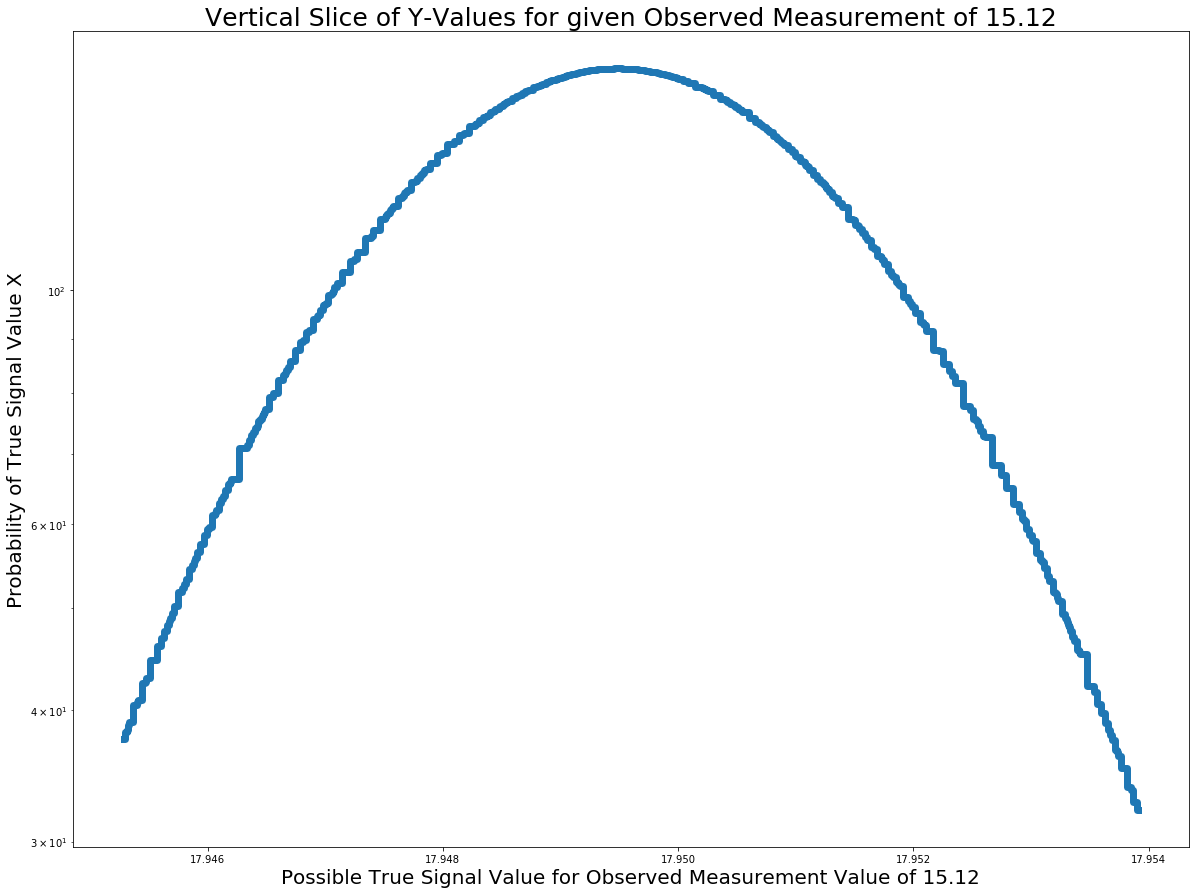

In [218]:
signal2S = np.sort(signal2)
data2S = np.sort(data2)
xsliceB = []
for i in range(len(data2)):
    if data2S[i] >= 15.12 and data2S[i] <= 15.13:
        xsliceB.append(signal2S[i])

print(np.sort(xsliceB[0::10])) # Sampled (every tenth) values of signal distribution
print(f'{np.mean(xsliceB)} is the mean of the signal values') # Mean signal value for this observed data slice
print(f'{np.std(xsliceB)} is the std deviation') # Std Deviation for plotting purposes of the pdf

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible True Signal Value for Observed Measurement Value of 15.12', size=20)
plt.ylabel('Probability of True Signal Value X', size=20)
plt.title('Vertical Slice of Y-Values for given Observed Measurement of 15.12', size=25)
ax.step(np.sort(xsliceB), stats.norm.pdf(xsliceB, loc=np.mean(xsliceB), scale=np.std(xsliceB)), where='mid', linewidth=7)
plt.show()

- This plot shows that if I measure a signal value of 15.12, it is more than likely going to be associated with a true signal that holds a value of 17.9-18.0, and is very unlikely associated with a true signal of 15.12
- The plots are not centered on the same value as the previous group of plots because the normal background distribution added to the data is a set of random variates with a mean value of -3, so the x-axis is going to be distributed the same as the y-axis just like before, but will (on average) be shifted by a value of -3, sometimes shifted a little more or a little less than -3, but very rarely will the signal be shifted a value of 0, so overall, the plots are not centered like the previous group.